# Demo-1+: Vergleich von Zeitreihen mit Liniendiagrammen 

## Importing Dependencies

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as wgts
from IPython.display import display
import numpy as np

## Loading Datasets

In [18]:
covid_19_dataset = pd.read_csv('cleaned_dataset.csv')
regions_dataset = pd.read_csv('regions_dataset.csv')

## Plotting Functions

### Region Based Plotting

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_region_timeseries(region: str, from_date: str, to_date: str):
    """
    Plots a time series graph for a given country, continent, or the world within a specified date range.

    Parameters:
        region (str): The country, continent, or "World".
        from_date (str): Start date in 'YYYY-MM-DD' format.
        to_date (str): End date in 'YYYY-MM-DD' format.
    """
    global regions_dataset  # Assumes regions_dataset is defined somewhere in the notebook
    df = pd.read_csv("cleaned_dataset.csv")

    # Convert Date column to datetime
    df['Date'] = pd.to_datetime(df['Date'])

    # Filter dataset for the given date range
    df = df[(df['Date'] >= from_date) & (df['Date'] <= to_date)]

    if region == "World":
        # Aggregate data for the entire world
        df_region = df.groupby("Date")[["Confirmed", "Recovered", "Deaths"]].sum().reset_index()
    elif region in regions_dataset["Continent"].unique():
        # Get countries belonging to the specified continent
        countries_in_continent = regions_dataset[regions_dataset["Continent"] == region]["Country"].unique()
        df_region = df[df["Country"].isin(countries_in_continent)].groupby("Date")[["Confirmed", "Recovered", "Deaths"]].sum().reset_index()
    else:
        # Treat as a country
        df_region = df[df["Country"] == region].sort_values(by="Date")

    # Compute cumulative sum
    df_region["Total Confirmed"] = df_region["Confirmed"].cumsum()
    df_region["Total Recovered"] = df_region["Recovered"].cumsum()
    df_region["Total Deaths"] = df_region["Deaths"].cumsum()

    # Plot time series graph
    plt.figure(figsize=(12, 6))
    plt.plot(df_region["Date"], df_region["Total Confirmed"], label="Confirmed Cases", color='blue')
    plt.plot(df_region["Date"], df_region["Total Recovered"], label="Recovered Cases", color='green')
    plt.plot(df_region["Date"], df_region["Total Deaths"], label="Deaths", color='red')

    # Formatting the plot
    plt.xlabel("Date")
    plt.ylabel("Cumulative Count")
    plt.title(f"COVID-19 Time Series for {region} ({from_date} to {to_date})")
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True)

    # Show plot
    plt.show()

### Multiple Time Series Plotting

In [20]:
def plot_multiple_timeseries(regions: list, column: str, from_date: str, to_date: str):
    """
    Plots a time series graph for multiple regions (countries, continents, or World) for a given column.

    Parameters:
        regions (list): List of regions (country names, continent names, or "World").
        column (str): The column to plot ("Confirmed", "Recovered", or "Deaths").
        from_date (str): Start date in 'YYYY-MM-DD' format.
        to_date (str): End date in 'YYYY-MM-DD' format.
    """

    df = pd.DataFrame(covid_19_dataset)

    # Convert Date column to datetime
    df['Date'] = pd.to_datetime(df['Date'])

    # Filter dataset for date range
    df = df[(df['Date'] >= from_date) & (df['Date'] <= to_date)]

    # Initialize the plot
    plt.figure(figsize=(12, 6))

    for region in regions:
        if region == "World":
            # Aggregate data globally
            df_region = df.groupby("Date")[column].sum().reset_index()
        elif region in regions_dataset["Continent"].unique():
            # Get countries belonging to the continent
            countries_in_continent = regions_dataset[regions_dataset["Continent"] == region]["Country"].unique()
            df_region = df[df["Country"].isin(countries_in_continent)].groupby("Date")[column].sum().reset_index()
        else:
            # Treat as a country
            df_region = df[df["Country"] == region].sort_values(by="Date")
    
        # Compute cumulative sum for the selected column
        df_region[f"Total {column}"] = df_region[column].cumsum()

        # Plot the time series
        plt.plot(df_region["Date"], df_region[f"Total {column}"], label=f"{region} ({column})")

    # Formatting the plot
    plt.xlabel("Date")
    plt.ylabel("Cumulative Count")
    plt.title(f"COVID-19 {column} Cases Over Time ({from_date} to {to_date})")
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True)

    # Show plot
    plt.show()

## Creating Widgets

### Creating Countries & Continents Dropdown Menus

In [21]:
regions = regions_dataset['Continent'].unique().tolist()

regions.insert(0, 'World')
regions_dropdown_menu = wgts.Dropdown(
    options= regions,
    description='Region:',
    disabled=False,
)

countries = regions_dataset['Country'].sort_values(ascending=True).to_list()
countries.insert(0, 'None')

countries_dropdown_menu = wgts.Dropdown(
    options= countries,
    description='Country:',
    disabled=False,
)

### Creating From/To Day DatePickers

In [22]:
import datetime
# minimum date value in dataset
dateMin = datetime.datetime.strptime(covid_19_dataset['Date'].min(), '%Y-%m-%d').date()
# maximum date value in dataset
dateMax = datetime.datetime.strptime(covid_19_dataset['Date'].max(), '%Y-%m-%d').date()

from_datepicker = wgts.DatePicker(
    description='From:',
    disabled=False,
    value=dateMin,
    max=dateMax,
    min=dateMin,
)

to_datepicker = wgts.DatePicker(
    description='To:',
    disabled=False,
    value=dateMax,
    max=dateMax,
    min=dateMin,
)

### Demo Category Radio Button

In [23]:
demo_category_radio = wgts.RadioButtons(
    options=['Show Time Series For Region', 'Compare Time Series For Multiple Regions'],
    description='Regional Category:',
    disabled=False
)

### Creating Reload, Remove, Add Buttons

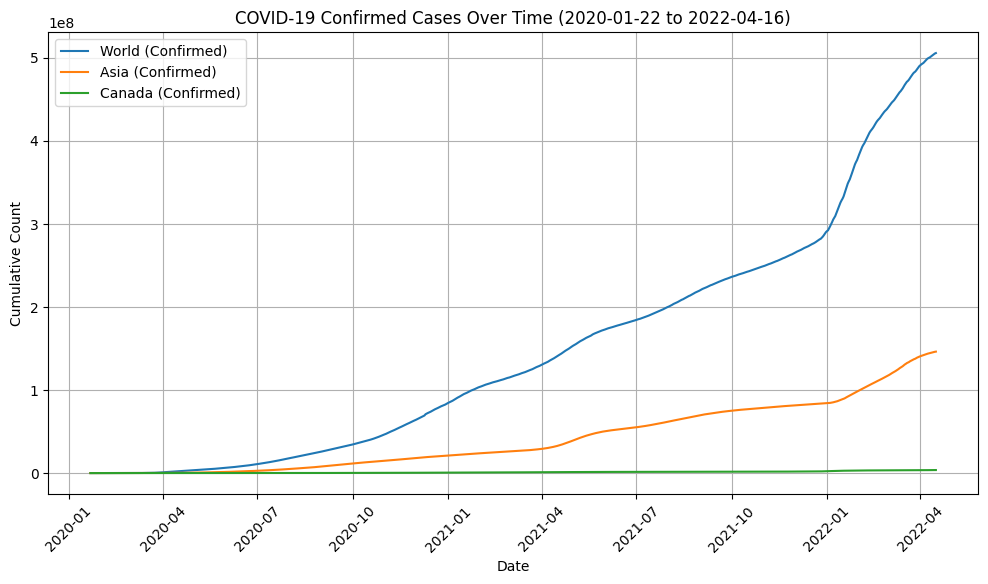

In [24]:
reload_button = wgts.Button(
    description='Reload',
    disabled=False,
    button_style='info',
    tooltip='Reload Graph',
    icon='check'
)

remove_button = wgts.Button(
    description='Remove',
    disabled=False,
    button_style='danger',
    tooltip='Remove Region',
    icon='minus'
)

add_button = wgts.Button(
    description='Add',
    disabled=False,
    button_style='success',
    tooltip='Add Region',
    icon='plus'
)

### Selected Regions Menu

In [25]:
selected_regions_menu = wgts.Select(
    description='Regions:',
    disabled=False
)

### Column Selection Toggle Buttons

In [26]:
column_selection_buttons = wgts.ToggleButtons(
    options=['Confirmed', 'Recovered', 'Deaths'],
    description='Column:',
    disabled=False,
    button_style='warning', # 'success', 'info', 'warning', 'danger' or ''
    tooltips=['Confirmed Cases Of Covid-19', 'Recoveries From Covid-19', 'Deaths From Covid-19'],
)

## Widget Events

### Demo Category Radio Button Event

In [27]:
def on_demo_category_change(change):
    if change['new'] == 0:
        selected_regions_menu.disabled = True
        column_selection_buttons.disabled = True
        add_button.disabled = True
        remove_button.disabled = True
    elif change['new'] == 1:
        selected_regions_menu.disabled = False
        column_selection_buttons.disabled = False
        add_button.disabled = False
        remove_button.disabled = False

demo_category_radio.observe(on_demo_category_change, 'index')

### Add/Remove Buttons Clicked Events

In [28]:
def on_add_button_clicked(change):
    if countries_dropdown_menu.value == 'None':
        temp_options = list(selected_regions_menu.options)
        temp_options.append(regions_dropdown_menu.value)
        temp_options = tuple(temp_options)
        selected_regions_menu.options = temp_options
    else:
        temp_options = list(selected_regions_menu.options)
        temp_options.append(countries_dropdown_menu.value)
        temp_options = tuple(temp_options)
        selected_regions_menu.options = temp_options

def on_remove_button_clicked(change):
    if selected_regions_menu.options == ():
        return
    else:
        temp_options = list(selected_regions_menu.options)
        temp_options.remove(selected_regions_menu.value)
        temp_options = tuple(temp_options)
        selected_regions_menu.options = temp_options

add_button.on_click(on_add_button_clicked)
remove_button.on_click(on_remove_button_clicked)

### Region Dropdown Menu Event

In [29]:
def on_regions_menu_change(change):
    # load countries of newly selected continent
    if change['new'] == 'World':
        countries = regions_dataset['Country'].sort_values(ascending=True).to_list()
        countries.insert(0, 'None')
        countries_dropdown_menu.options = countries
        return
    continent = change['new']
    continent_filter = regions_dataset['Continent'] == continent
    countries = regions_dataset[continent_filter]
    countries = countries['Country'].sort_values(ascending=True).to_list()
    countries.insert(0, 'None')
    countries_dropdown_menu.options = countries

regions_dropdown_menu.observe(on_regions_menu_change, 'value')

### Reload Button Clicked

In [ ]:
def on_reload_button_clicked(change):
    # case individual region time series
    if demo_category_radio.index == 0:
        # if no country selected
        if countries_dropdown_menu.value == 'None':
            region = regions_dropdown_menu.value
            from_date = str(from_datepicker.value)
            to_date = str(to_datepicker.value)
            plot_region_timeseries(region, from_date, to_date)
        # if a country is selected
        else:
            country = countries_dropdown_menu.value
            from_date = str(from_datepicker.value)
            to_date = str(to_datepicker.value)
            plot_region_timeseries(country, from_date, to_date)
    # case multiple region time series
    elif demo_category_radio.index == 1:
        # handling invalid cases
        if selected_regions_menu.options == ():
            raise ValueError("ERROR: no regions selected for comparison")
        elif to_datepicker.value <= from_datepicker.value:
            raise ValueError("ERROR: 'To' date must be bigger than 'From' Date")
        else:
            regions = list(selected_regions_menu.options)
            from_date = str(from_datepicker.value)
            to_date = str(to_datepicker.value)
            column = column_selection_buttons.value
            plot_multiple_timeseries(regions, column, from_date, to_date)


reload_button.on_click(on_reload_button_clicked)